## 1. Importação das Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##2. Carregamento dos Dados

In [9]:
#Leitura do csv
url = 'https://raw.githubusercontent.com/Leonardo-Ikeda/coffee-sales-analysis/refs/heads/main/index_1.csv'

df = pd.read_csv(url)

## 3. Visualização Inicial dos Dados

In [12]:
# Primeiras linhas do dataset
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [11]:
# Informações gerais
df.info()

# Estatísticas descritivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


##4. Limpeza e Pré-processamento dos Dados

In [ ]:
# Transformando as colunas date e datetime de object para o formato datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 170.6+ KB


In [ ]:
# Avaliar presença de linhas duplicadas
df.duplicated().sum()

np.int64(0)

In [ ]:
# Avaliar presença de dados nulos
df.isna().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


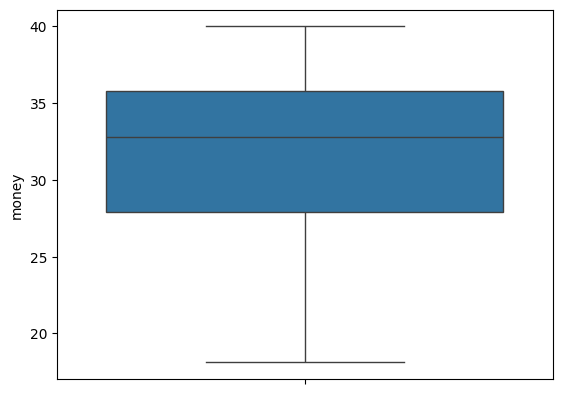

In [ ]:
# Avaliar presença de valores outliers

sns.boxplot(df['money']);

##5. Análise Exploratória de Dados (EDA)

In [ ]:
tipo_cafe = df.groupby('coffee_name')[['money']].sum().sort_values('money')
tipo_cafe

,money
coffee_name,
Espresso,2814.28
Cortado,7534.86
Cocoa,8678.16
Hot Chocolate,10172.46
Americano,15062.26
Cappuccino,18034.14
Americano with Milk,25269.12
Latte,27866.30


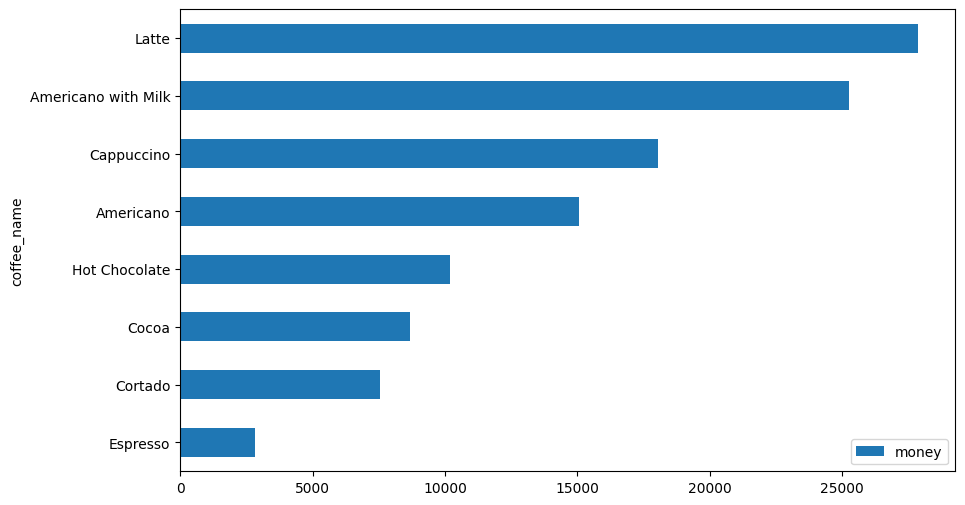

In [ ]:
tipo_cafe.plot(kind='barh', figsize=(10,6));

In [ ]:
tipo_pagamento = df.groupby('cash_type')[['money']].sum().sort_values('money')
tipo_pagamento

,money
cash_type,
cash,3186.00
card,112245.58


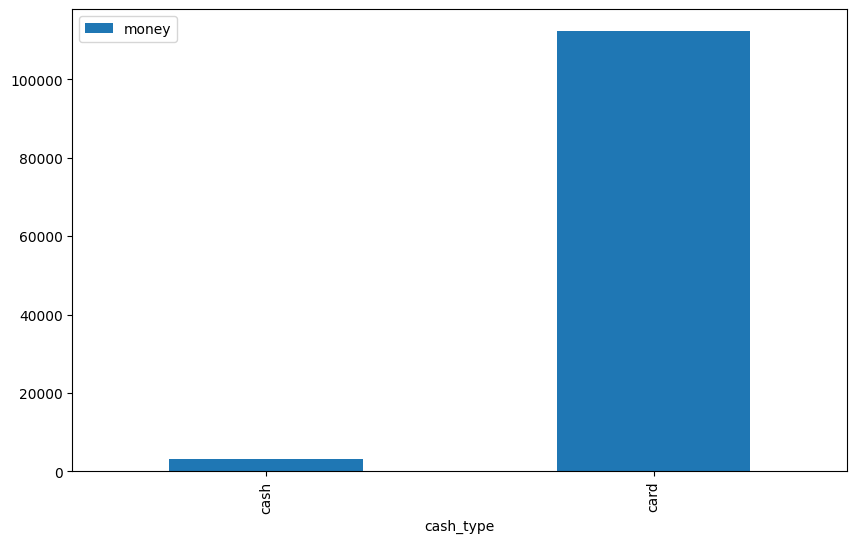

In [ ]:
tipo_pagamento.plot(kind='bar', figsize=(10,6));

##7. Insights e Conclusões

In [ ]:
venda_mes_ano = df.groupby(df['date'].dt.strftime('%Y/%m'))[['money']].sum()

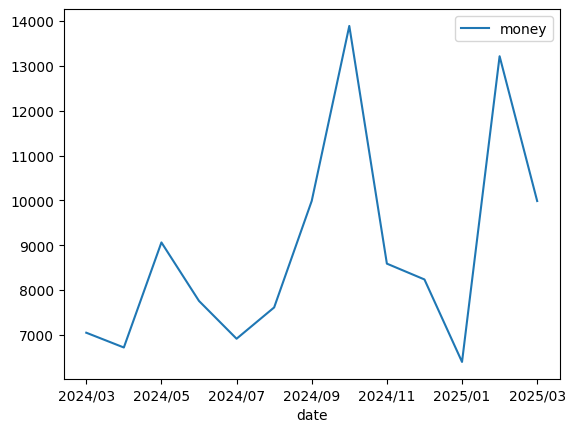

In [ ]:
# Analisar o comportamento de vendas ao longo dos meses
venda_mes_ano.plot();

In [ ]:
# Criando coluna no DataFrame 'dia_da_semana'
df['dia_da_semana'] = df['date'].dt.strftime('%A')

# Agrupando os dados de vendas por dia da semana, para analisar comportamento de vendas ao longo da semana
vendas_dia_da_semana = df.groupby('dia_da_semana')['money'].sum('money').sort_values()

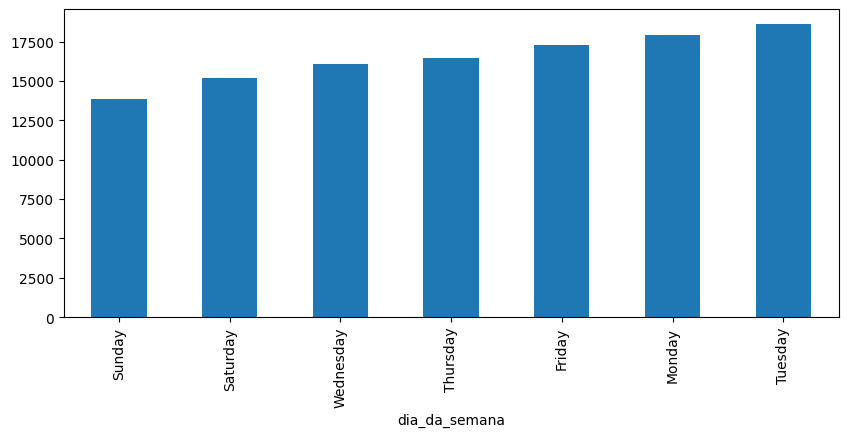

In [ ]:
vendas_dia_da_semana.plot(kind='bar', figsize=(10,4));

In [ ]:
df.to_csv('coffee_sales.csv')

## 📌 Observações

*   Dataset utilizado: https://www.kaggle.com/datasets/ihelon/coffee-sales
*   Autor: Leonardo Ikeda
*   Data da análise: Abril/2025